In [62]:
import ctypes
import matplotlib.pyplot as plt
import numpy as np

ASSET_CORR = 0.2
N_SIMS = 1_000_000

In [63]:
class Config(ctypes.Structure):
    _fields_ = [
        ("path", ctypes.c_char * 1024),
        ("asset_corr", ctypes.c_float),
        ("n_sims", ctypes.c_int),
    ]

class Result(ctypes.Structure):
    _fields_ = [
        ("ms", ctypes.c_float),
        ("L_PF", ctypes.POINTER(ctypes.c_float)),
        ("LR_PF", ctypes.POINTER(ctypes.c_float)),
        ("pf_size", ctypes.c_int)
    ]

libmonte = ctypes.CDLL("./libmerton.so")
libmonte.simulate.argtypes = [Config]
libmonte.simulate.restype = Result

In [70]:
config = Config("./example_portfolio.csv".encode("utf-8"), ASSET_CORR, N_SIMS)
result = libmonte.simulate(config)
print(f"simulation took {result.ms:.2f} ms")
l_pf = [float(result.L_PF[i]) for i in range(result.pf_size)]
lr_pf = [float(result.LR_PF[i]) for i in range(result.pf_size)]

simulation took 3816.09 ms


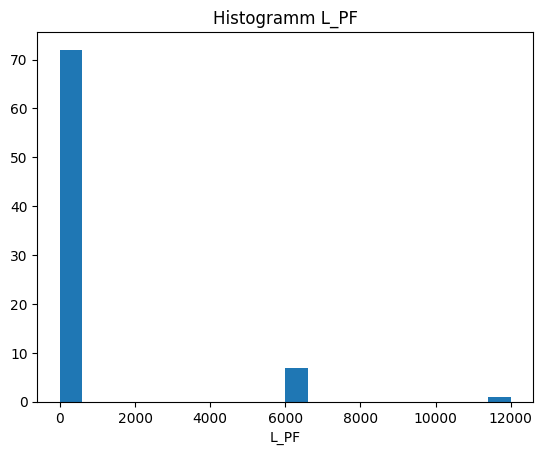

In [71]:
fig, ax = plt.subplots()
ax.set_title(f"Histogramm L_PF")

ax.hist(l_pf, bins=20)
ax.set_xlabel("L_PF")
plt.show()

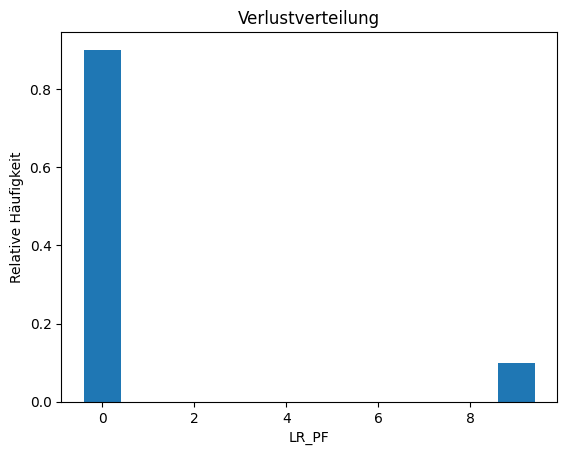

In [66]:
count, bins = np.histogram(lr_pf)
y = count/np.sum(count)

fig, ax = plt.subplots()
ax.set_title(f"Verlustverteilung")

ax.bar(np.arange(len(y)), y)
ax.set_xlabel("LR_PF")
ax.set_ylabel("Relative Häufigkeit")
plt.show()

NameError: name 'PF_SIZE' is not defined

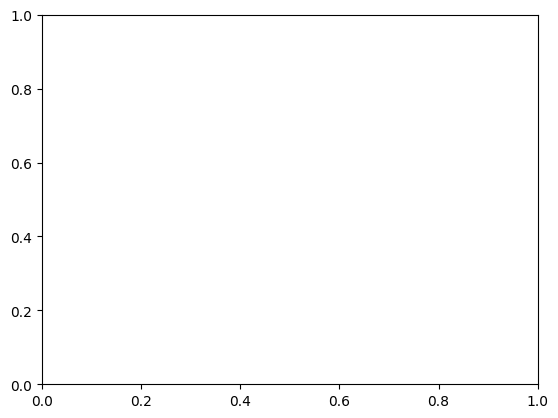

In [67]:
fig, ax = plt.subplots()
ax.set_title(f"Histogramm  (kumuliert) von $L_{{PF}}$ \n pf_size=${PF_SIZE*EAD}$")

ax.hist(l_pf, bins=10, cumulative=True, density=True)
ax.set_xlabel("L_PF")
ax.set_ylabel("Häufigkeitsdichte")
plt.show()